# EV_Data_Visualization

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv('merged_data.csv')

In [14]:
# df.corr().unstack()[abs(df.corr().unstack()) >= 0.6]

Energy_(kWh)          Energy_(kWh)            1.000000
                      GHG_Savings_(kg)        1.000000
                      Gasoline_Savings_(L)    1.000000
                      Fee                     0.825739
GHG_Savings_(kg)      Energy_(kWh)            1.000000
                      GHG_Savings_(kg)        1.000000
                      Gasoline_Savings_(L)    1.000000
                      Fee                     0.825739
Gasoline_Savings_(L)  Energy_(kWh)            1.000000
                      GHG_Savings_(kg)        1.000000
                      Gasoline_Savings_(L)    1.000000
                      Fee                     0.825739
Fee                   Energy_(kWh)            0.825739
                      GHG_Savings_(kg)        0.825739
                      Gasoline_Savings_(L)    0.825739
                      Fee                     1.000000
Port                  Port                    1.000000
Temp (C)              Temp (C)                1.000000
          

In [15]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

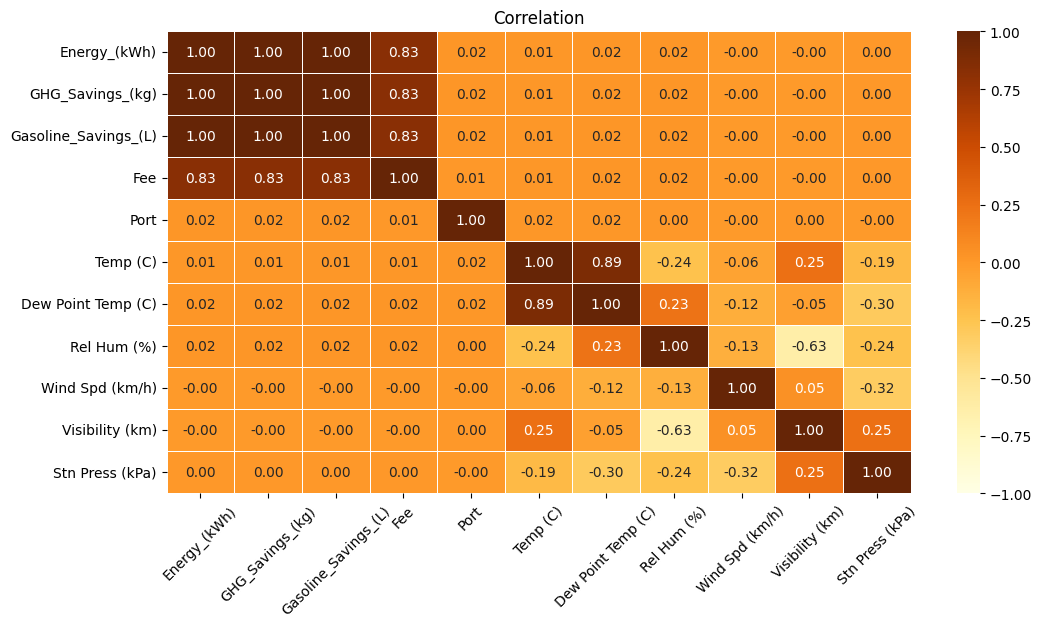

In [21]:
plt.subplots(figsize=(12, 6))

sns.heatmap(df.corr(),  
            vmax=1, vmin=-1,  
            center=0,  
            linewidths=.5,  
            fmt='.2f',  
            cmap='YlOrBr', 
            annot=True,  
            xticklabels=True)  

plt.xticks(rotation=45)  
plt.title('Correlation')  
plt.show()  

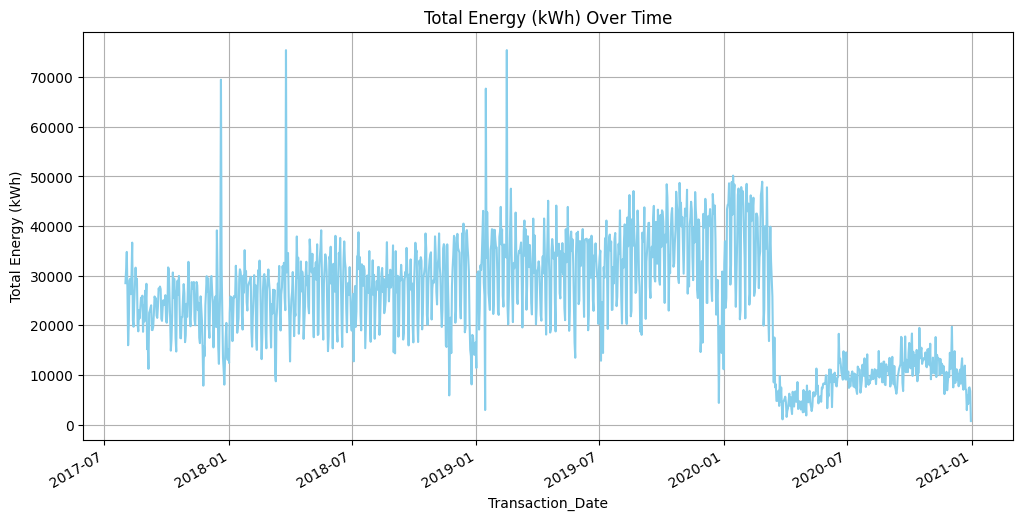

In [23]:
plt.figure(figsize=(12, 6))
df.groupby('Transaction_Date')['Energy_(kWh)'].sum().plot(color="skyblue")
plt.title('Total Energy (kWh) Over Time')
plt.ylabel('Total Energy (kWh)')
plt.grid(True)
plt.show()

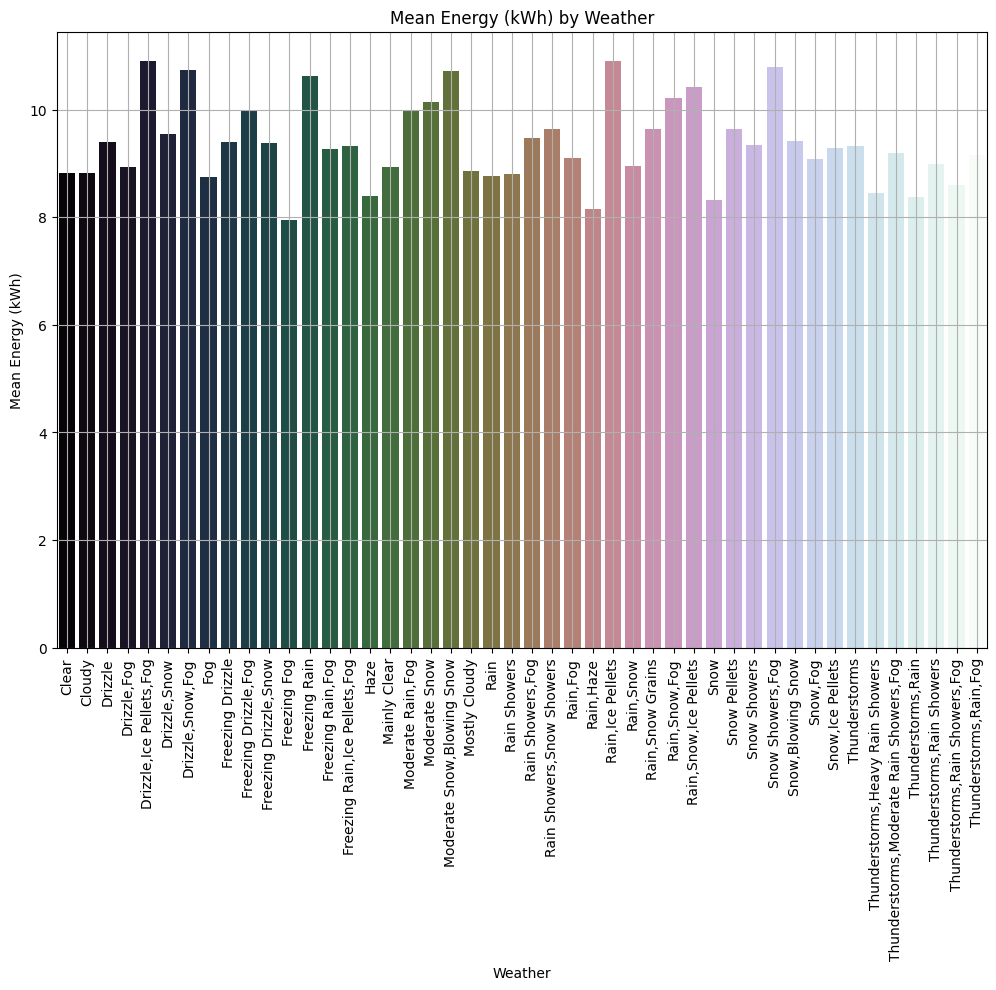

In [17]:
weather_mean_energy = df.groupby('Weather')['Energy_(kWh)'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=weather_mean_energy, x='Weather', y='Energy_(kWh)', palette='cubehelix')
plt.xticks(rotation=90)
plt.xlabel('Weather')
plt.ylabel('Mean Energy (kWh)')
plt.title('Mean Energy (kWh) by Weather')
plt.grid()
plt.show()

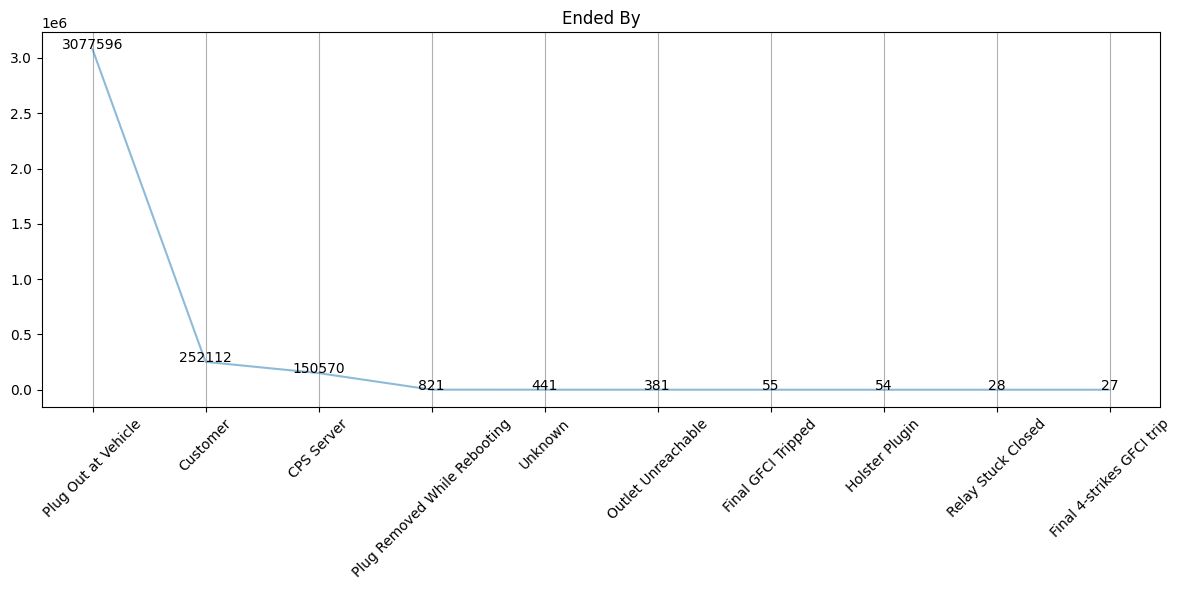

In [24]:
ended_by_index = df.Ended_By.value_counts().index
ended_by_values = df.Ended_By.value_counts().values

plt.figure(figsize=(12, 6))
plt.plot(ended_by_index, ended_by_values, alpha=0.5)

for label, value in zip(ended_by_index, ended_by_values):
    plt.annotate(f'{value}', (label, value), textcoords="offset points", xytext=(0,0), ha='center')

plt.title('Ended By')
plt.grid(axis='x')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

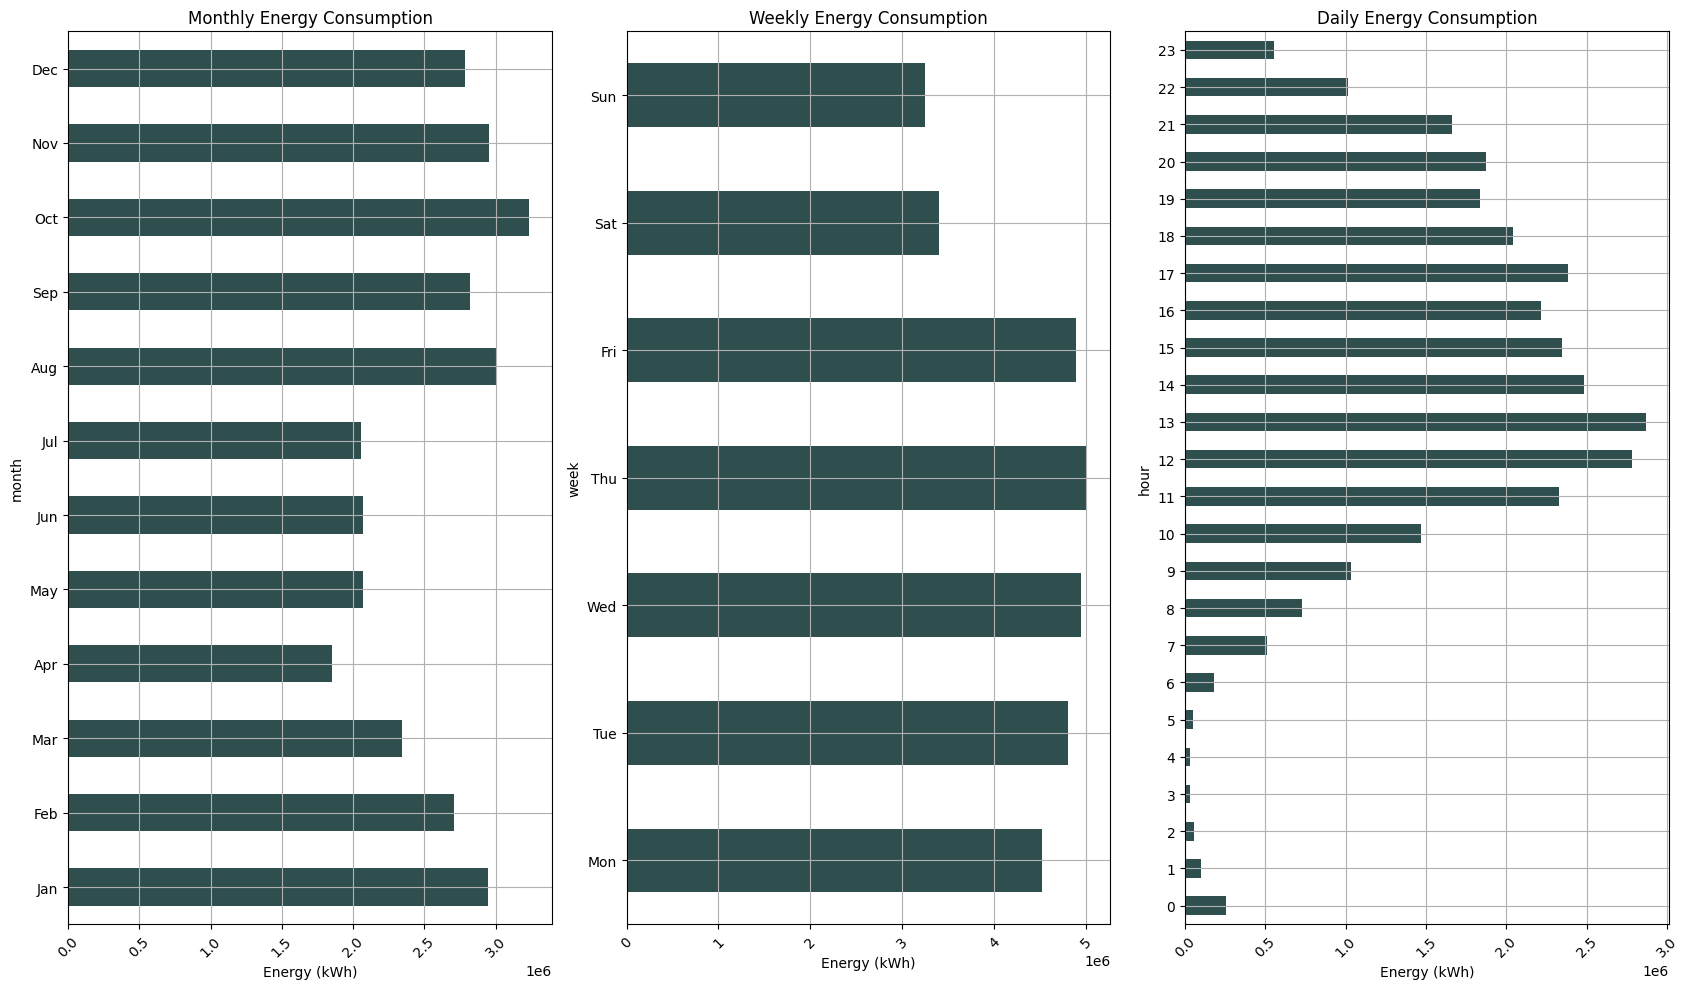

In [ ]:

df['month'] = df['Transaction_Date'].dt.month
df['week'] = df['Transaction_Date'].dt.weekday + 1
df['hour'] = df['Timestamp'].dt.hour


plt.figure(figsize=(17, 10))


plt.subplot(1, 3, 1)
df.groupby('month')['Energy_(kWh)'].sum().plot(kind='barh', color='darkslategrey')
plt.title('Monthly Energy Consumption')
plt.xlabel('Energy (kWh)')
plt.yticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(rotation=45) 
plt.grid(True)

plt.subplot(1, 3, 2)
df.groupby('week')['Energy_(kWh)'].sum().plot(kind='barh', color='darkslategrey')
plt.title('Weekly Energy Consumption')
plt.xlabel('Energy (kWh)')
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xticks(rotation=45) 
plt.grid(True)


plt.subplot(1, 3, 3)
df.groupby('hour')['Energy_(kWh)'].sum().plot(kind='barh', color='darkslategrey')
plt.title('Daily Energy Consumption')
plt.xlabel('Energy (kWh)')
plt.xticks(rotation=45) 
plt.grid(True)

plt.tight_layout()
plt.show()